### Altitude vs Time (Flights 2024-07-07)

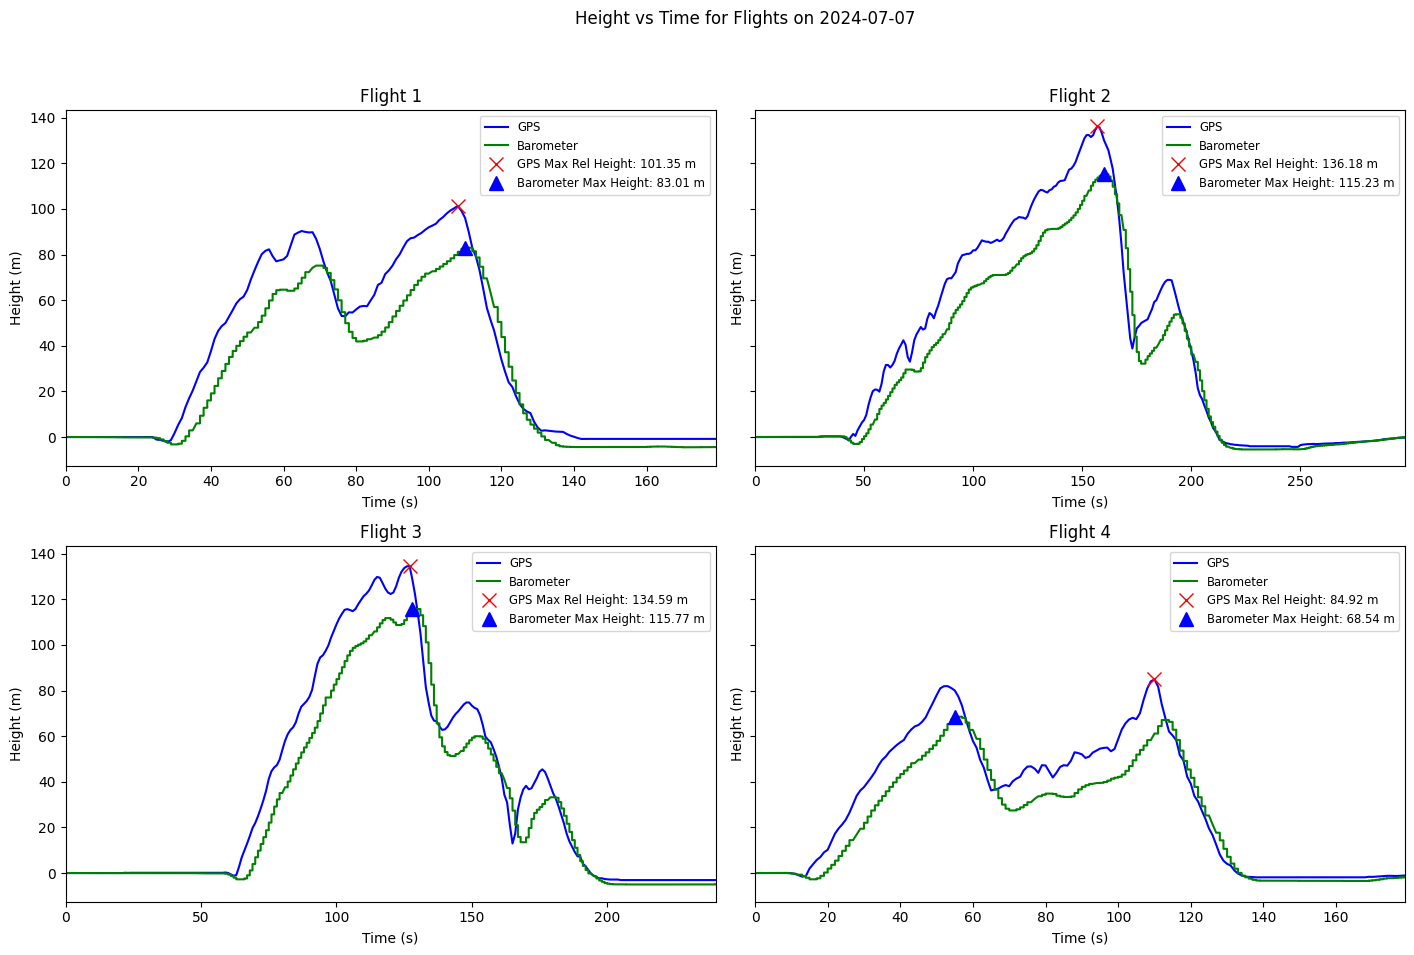

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the base path and file names
base_path = '../Data_Cleaning/Cleaned_flights/2024-07-07'
file_names = [
    'flight1_2024-07-07.csv',
    'flight2_2024-07-07.csv',
    'flight3_2024-07-07.csv',
    'flight4_2024-07-07.csv'
]

# Create a list to store dataframes, time ranges, and max heights
dataframes = []
time_ranges = []
max_heights = []
max_altimeter_heights = []  # To store max altimeter heights and their times

# Read data from each file
for file_name in file_names:
    file_path = os.path.join(base_path, file_name)
    # Read the CSV file and extract relevant columns
    df = pd.read_csv(file_path, usecols=['locationTimestamp_since1970(s)', 'locationAltitude(m)', 'altimeterRelativeAltitude(m)'])
    
    # Adjust time to represent seconds from the start of the flight
    start_time = df['locationTimestamp_since1970(s)'].iloc[0]
    df['locationTimestamp_since1970(s)'] -= start_time
    
    # Normalize location altitude by subtracting the first reading
    initial_location_altitude = df['locationAltitude(m)'].iloc[0]
    df['relativeLocationAltitude(m)'] = df['locationAltitude(m)'] - initial_location_altitude
    
    # Normalize altimeter altitude by subtracting the first reading
    initial_altimeter_altitude = df['altimeterRelativeAltitude(m)'].iloc[0]
    df['relativeAltimeterAltitude(m)'] = df['altimeterRelativeAltitude(m)'] - initial_altimeter_altitude
    
    # Calculate the maximum relative height for location and altimeter measurements and their corresponding time
    max_relative_location_height = df['relativeLocationAltitude(m)'].max()
    max_relative_altimeter_height = df['relativeAltimeterAltitude(m)'].max()
    
    max_time_location = df[df['relativeLocationAltitude(m)'] == max_relative_location_height]['locationTimestamp_since1970(s)'].values[0]
    max_time_altimeter = df[df['relativeAltimeterAltitude(m)'] == max_relative_altimeter_height]['locationTimestamp_since1970(s)'].values[0]

    # Choose the maximum height and corresponding time for plotting
    max_height = max(max_relative_location_height, max_relative_altimeter_height)
    max_time = max_time_location if max_relative_location_height >= max_relative_altimeter_height else max_time_altimeter
    
    dataframes.append(df)
    time_ranges.append((df['locationTimestamp_since1970(s)'].min(), df['locationTimestamp_since1970(s)'].max()))
    max_heights.append((max_time, max_height))
    max_altimeter_heights.append((max_time_altimeter, max_relative_altimeter_height))

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Height vs Time for Flights on 2024-07-07')

# Plot data for each file with individual time ranges
for i, df in enumerate(dataframes):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    # Plot relative location height (GPS) vs time
    ax.plot(df['locationTimestamp_since1970(s)'], df['relativeLocationAltitude(m)'], label='GPS', color='blue')
    
    # Plot relative altimeter height (Barometric) vs time
    ax.plot(df['locationTimestamp_since1970(s)'], df['relativeAltimeterAltitude(m)'], label='Barometer', color='green')
    
    # Plot the maximum relative height with a red cross
    max_time, max_relative_height = max_heights[i]
    ax.plot(max_time, max_relative_height, 'rx', markersize=10, label=f'GPS Max Rel Height: {max_relative_height:.2f} m')  # Red cross marker
    
    # Plot the maximum altimeter height with a blue triangle
    max_time_altimeter, max_relative_altimeter_height = max_altimeter_heights[i]
    ax.plot(max_time_altimeter, max_relative_altimeter_height, 'b^', markersize=10, label=f'Barometer Max Height: {max_relative_altimeter_height:.2f} m')  # Blue triangle marker
    
    ax.set_title(f'Flight {i + 1}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Height (m)')
    
    # Place legend in the top-right corner with a smaller font size
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize='small')

    # Set the x-axis limits based on the time range for each flight
    ax.set_xlim(time_ranges[i])

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0.03, 0.95, 0.95])  # Adjust right side to accommodate legend
plt.show()


### Velocity vs Time (Flights 2024-07-07)

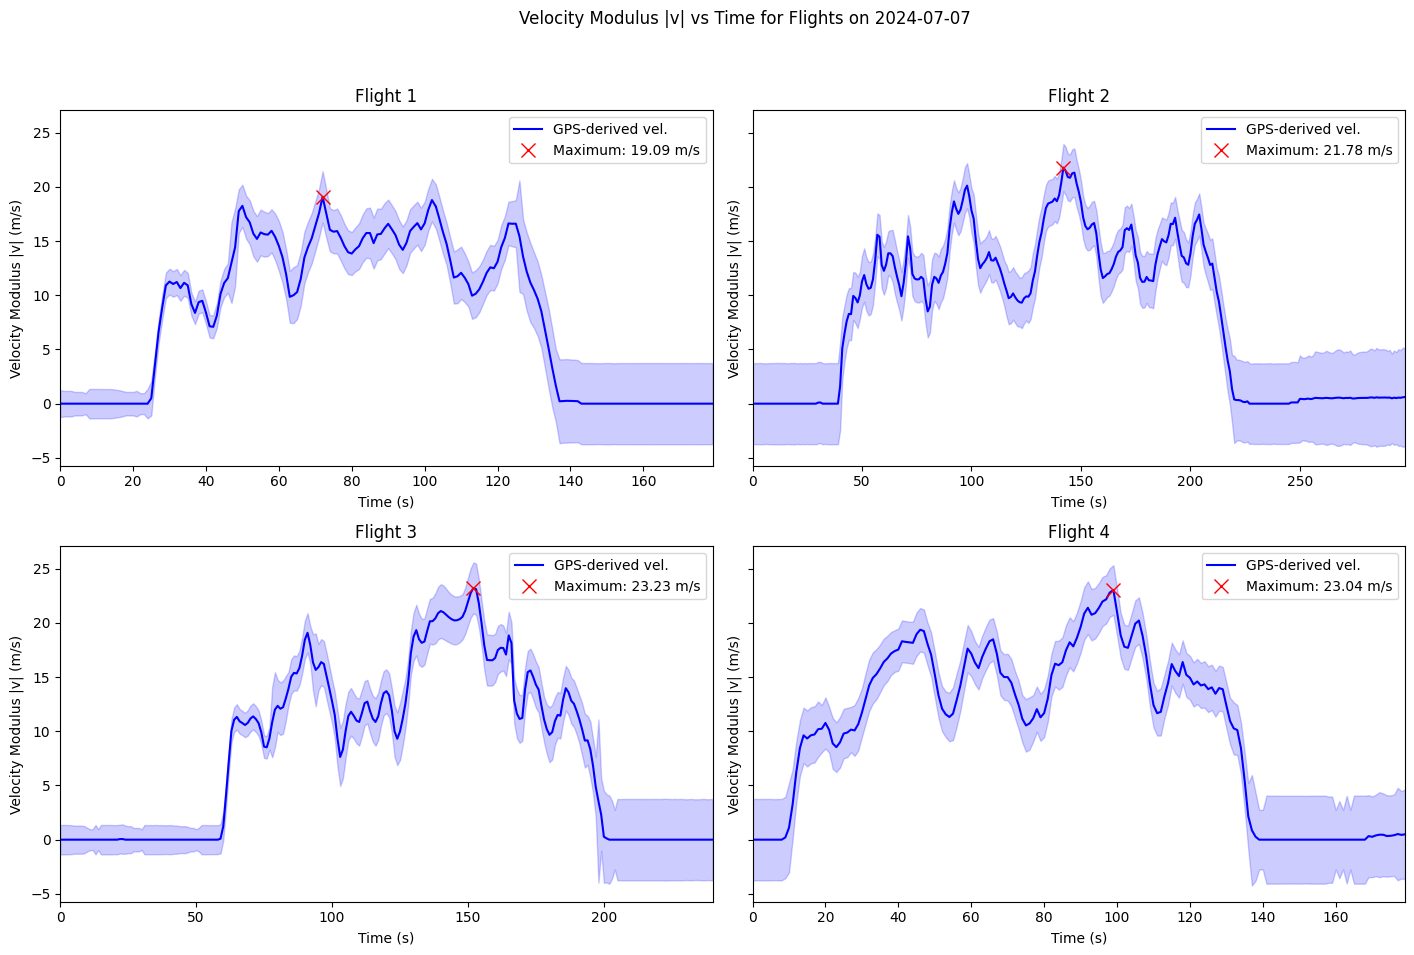

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the base path and file names
base_path = '../Data_Cleaning/Cleaned_flights/2024-07-07'
file_names = [
    'flight1_2024-07-07.csv',
    'flight2_2024-07-07.csv',
    'flight3_2024-07-07.csv',
    'flight4_2024-07-07.csv'
]

# Create lists to store dataframes, time ranges, and maximum speeds
dataframes = []
time_ranges = []
max_speeds = []

# Read data from each file
for file_name in file_names:
    file_path = os.path.join(base_path, file_name)
    # Read the CSV file and extract relevant columns
    df = pd.read_csv(file_path, usecols=['locationTimestamp_since1970(s)', 'locationSpeed(m/s)', 'locationSpeedAccuracy(m/s)'])
    
    # Adjust time to represent seconds from the start of the flight
    start_time = df['locationTimestamp_since1970(s)'].iloc[0]
    df['locationTimestamp_since1970(s)'] -= start_time
    
    # Calculate maximum speed and corresponding time
    max_speed = df['locationSpeed(m/s)'].max()
    max_time = df[df['locationSpeed(m/s)'] == max_speed]['locationTimestamp_since1970(s)'].values[0]
    
    dataframes.append(df)
    time_ranges.append((df['locationTimestamp_since1970(s)'].min(), df['locationTimestamp_since1970(s)'].max()))
    max_speeds.append((max_time, max_speed))

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Velocity Modulus |v| vs Time for Flights on 2024-07-07')

# Plot data for each file with individual time ranges
for i, df in enumerate(dataframes):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    # Plot velocity modulus vs time with shaded error bands
    ax.plot(df['locationTimestamp_since1970(s)'], df['locationSpeed(m/s)'], color='blue', label='GPS-derived vel.')
    
    # Fill the area between the velocity ± accuracy to create a shaded error band
    ax.fill_between(df['locationTimestamp_since1970(s)'], 
                    df['locationSpeed(m/s)'] - df['locationSpeedAccuracy(m/s)'], 
                    df['locationSpeed(m/s)'] + df['locationSpeedAccuracy(m/s)'], 
                    color='blue', alpha=0.2)  # Adjust alpha for transparency
    
    # Plot the maximum velocity modulus with a red cross
    max_time, max_speed = max_speeds[i]
    ax.plot(max_time, max_speed, 'rx', markersize=10, label=f'Maximum: {max_speed:.2f} m/s')  # Red cross marker
    
    # Update legend to include the maximum velocity modulus label
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1))
    
    ax.set_title(f'Flight {i + 1}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Velocity Modulus |v| (m/s)')
    
    # Set the x-axis limits based on the time range for each flight
    ax.set_xlim(time_ranges[i])

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0.03, 0.95, 0.95])  # Adjust right side to accommodate legend
plt.show()


### 4-D trajectory vs Time (Flights 2024-07-07)

C:\Users\senen\AppData\Local\Temp\ipykernel_22584\3236890170.py:25: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = transform(wgs84, mercator, lon, lat)
C:\Users\senen\AppData\Local\Temp\ipykernel_22584\3236890170.py:25: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = transform(wgs84, mercator, lon, lat)
C:\Users\senen\AppData\Local\Temp\ipykernel_22584\3236890170.py:25: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = transform(wgs84, mercator, lon, lat)
C:\Users\senen\AppData\Local\Temp\ipykernel_22584\3236890170.py:25: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = transform(wgs84, mercator, lo

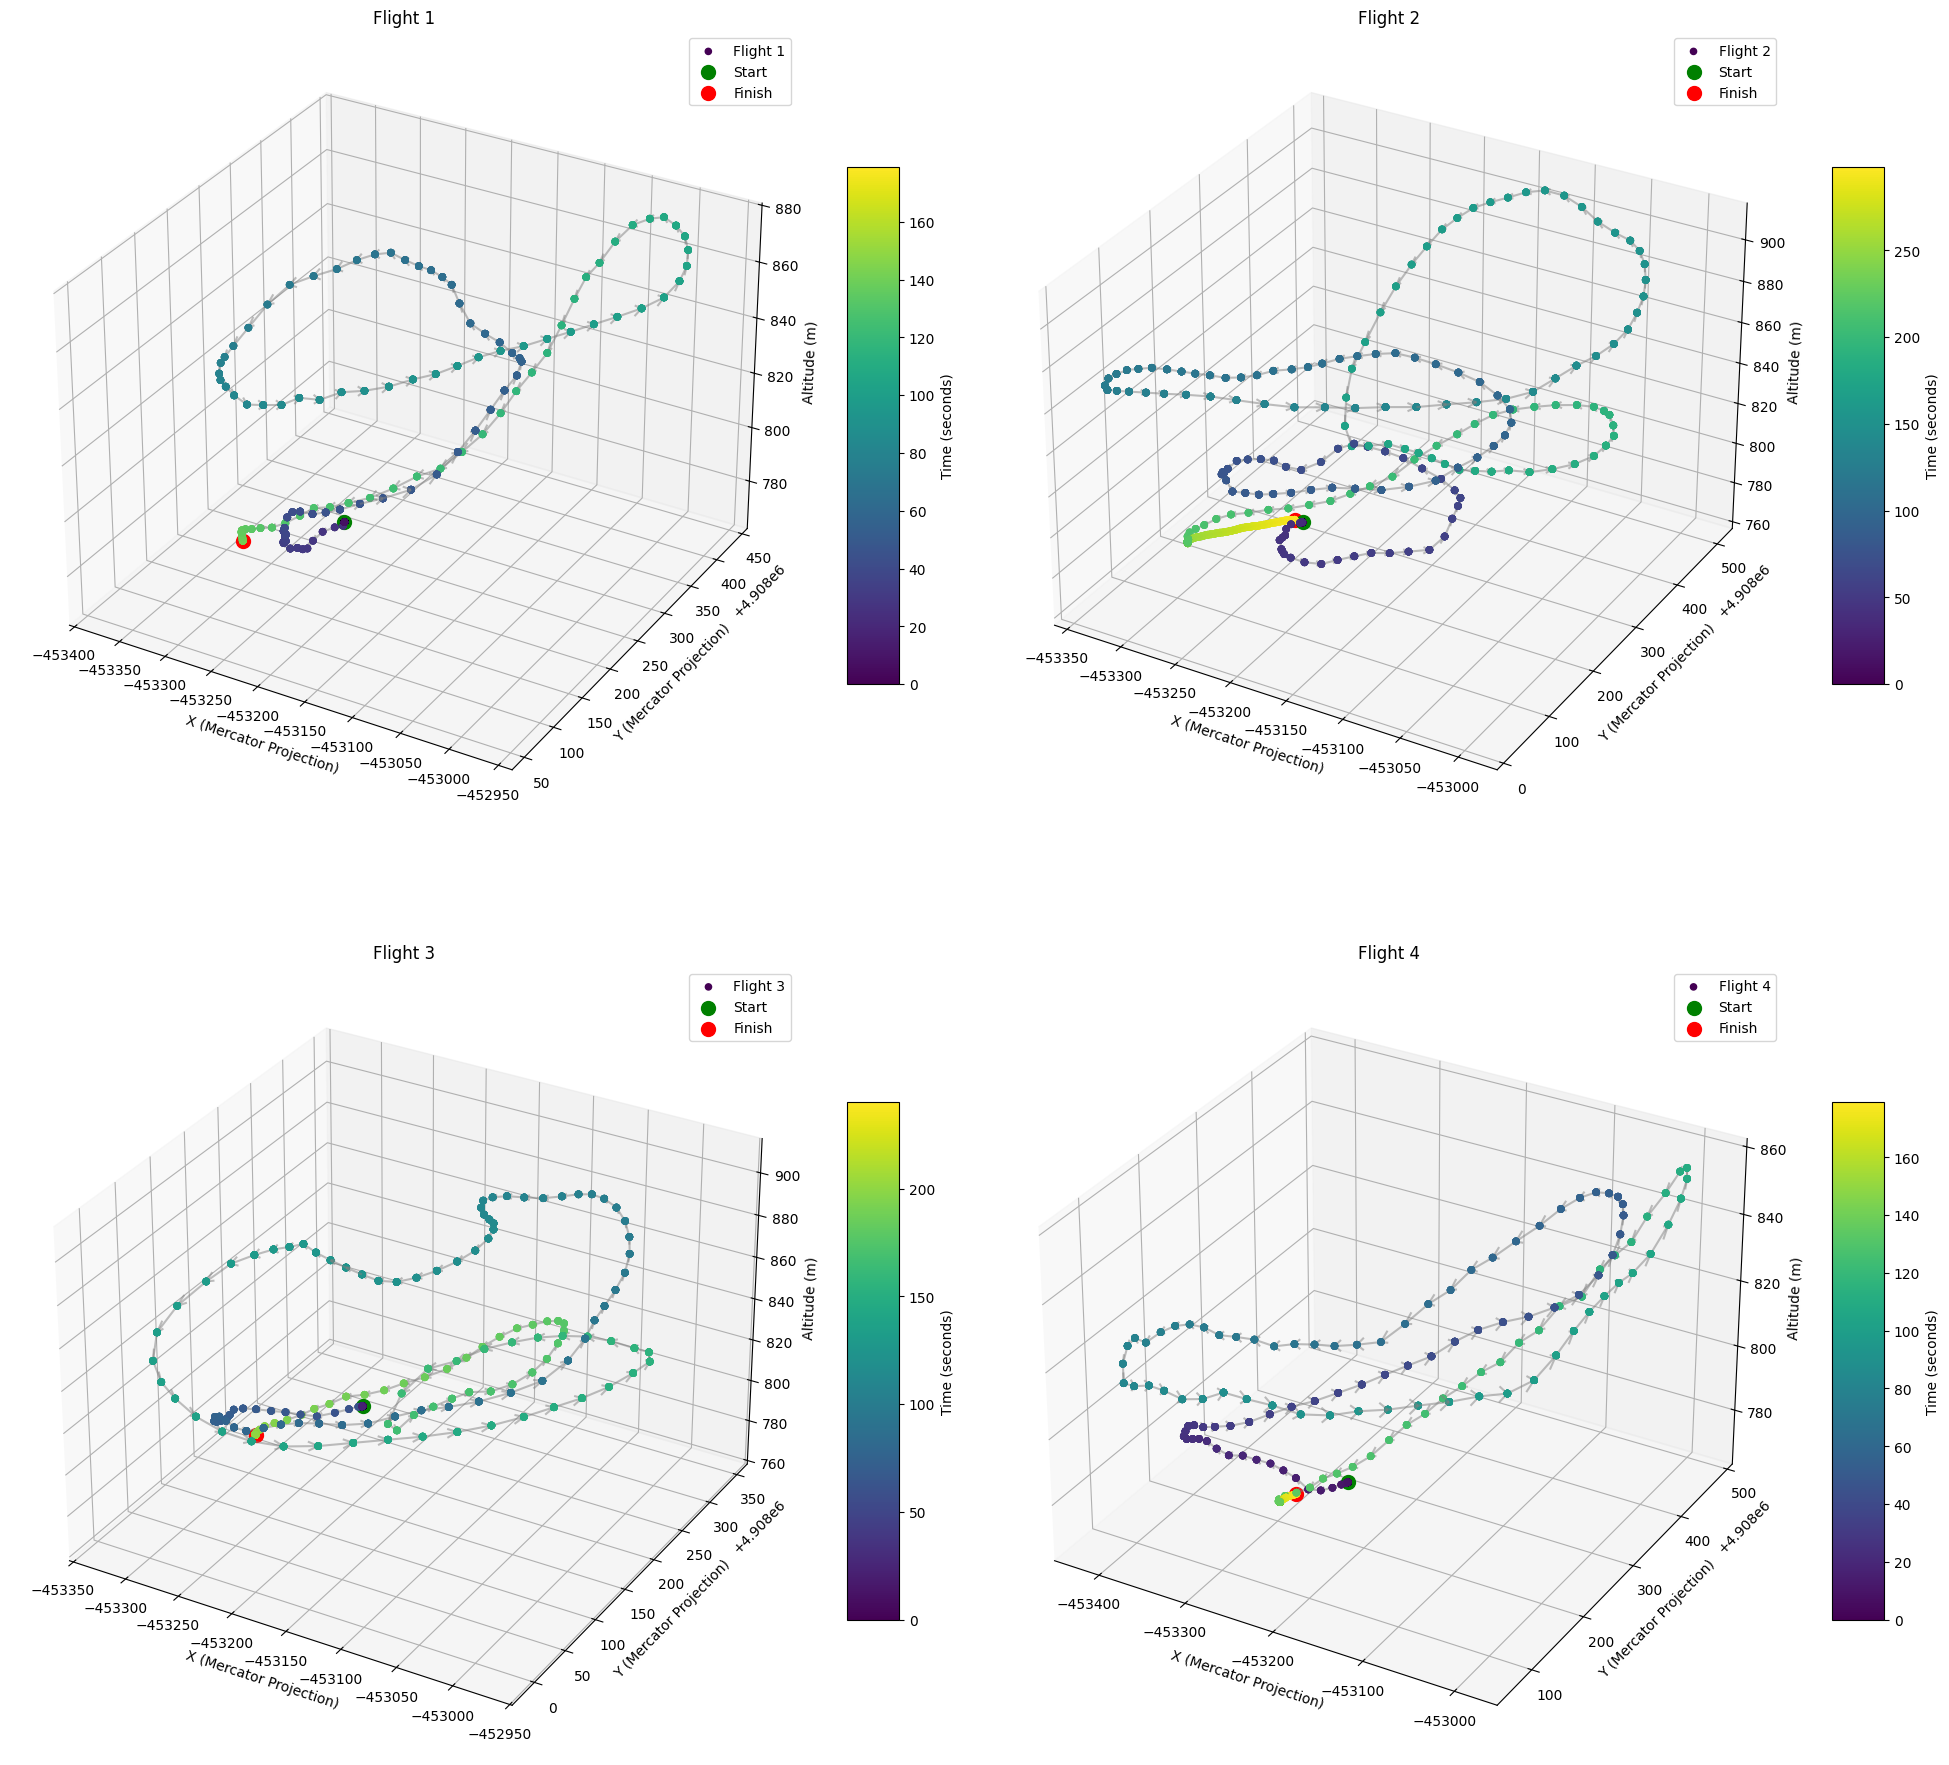

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyproj import Proj, transform
import os
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Define the base path and file names
base_path = '../Data_Cleaning/Cleaned_flights/2024-07-07'
file_names = [
    'flight1_2024-07-07.csv',
    'flight2_2024-07-07.csv',
    'flight3_2024-07-07.csv',
    'flight4_2024-07-07.csv'
]

# Define projections
wgs84 = Proj(proj='latlong', datum='WGS84')
mercator = Proj(proj='merc', datum='WGS84')

# Function to convert latitude and longitude to Mercator projection
def to_mercator(lat, lon):
    x, y = transform(wgs84, mercator, lon, lat)
    return x, y

# Create lists to store dataframes
dataframes = []

# Read data from each file
for file_name in file_names:
    file_path = os.path.join(base_path, file_name)
    # Read the CSV file and extract relevant columns
    df = pd.read_csv(file_path, usecols=['locationLatitude(WGS84)', 'locationLongitude(WGS84)', 'locationAltitude(m)', 'locationTimestamp_since1970(s)'])
    
    # Convert latitude and longitude to Mercator projection
    df['x'], df['y'] = to_mercator(df['locationLatitude(WGS84)'], df['locationLongitude(WGS84)'])
    
    # Normalize time (subtract the start time)
    start_time = df['locationTimestamp_since1970(s)'].iloc[0]
    df['normalizedTime'] = df['locationTimestamp_since1970(s)'] - start_time
    
    # Append the dataframe to the list
    dataframes.append(df)

# Create a single figure with a 2x2 grid of subplots
fig = plt.figure(figsize=(20, 20))

# Create 3D subplots for each flight
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

# List of axes for convenience
axes = [ax1, ax2, ax3, ax4]

for i, df in enumerate(dataframes):
    ax = axes[i]
    
    # Normalize time for color mapping
    norm = Normalize(vmin=df['normalizedTime'].min(), vmax=df['normalizedTime'].max())
    sm = ScalarMappable(cmap='viridis', norm=norm)
    
    # Plot the 3D trajectory with altitude as the z-axis
    sc = ax.scatter(df['x'], df['y'], df['locationAltitude(m)'], c=df['normalizedTime'], cmap='viridis', norm=norm, label=f'Flight {i + 1}', marker='o')
    
    # Plot start and finish points
    ax.scatter(df['x'].iloc[0], df['y'].iloc[0], df['locationAltitude(m)'].iloc[0], color='green', s=100, label='Start')
    ax.scatter(df['x'].iloc[-1], df['y'].iloc[-1], df['locationAltitude(m)'].iloc[-1], color='red', s=100, label='Finish')
    
    # Add color bar to show time
    cbar = plt.colorbar(sm, ax=ax, shrink=0.5, aspect=10)
    cbar.set_label('Time (seconds)')
    
    # Add vectors to show direction
    for j in range(len(df) - 1):
        ax.quiver(df['x'].iloc[j], df['y'].iloc[j], df['locationAltitude(m)'].iloc[j],
                  df['x'].iloc[j + 1] - df['x'].iloc[j], 
                  df['y'].iloc[j + 1] - df['y'].iloc[j], 
                  df['locationAltitude(m)'].iloc[j + 1] - df['locationAltitude(m)'].iloc[j], 
                  color='gray', alpha=0.5)
    
    ax.set_title(f'Flight {i + 1}')
    ax.set_xlabel('X (Mercator Projection)')
    ax.set_ylabel('Y (Mercator Projection)')
    ax.set_zlabel('Altitude (m)')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()
